In [ ]:
'''
Name : Rupesh Garsondiya
github : @Rupeshgarsondiya
Topic  : Next word prediction using LSTM
'''

'\nName : Rupesh Garsondiya\ngithub : @Rupeshgarsondiya\nTopic  : Next word prediction using LSTM\n'

In [1]:

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ronikdedhia/next-word-prediction

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ronikdedhia/next-word-prediction
License(s): unknown
  0% 0.00/228k [00:00<?, ?B/s]
100% 228k/228k [00:00<00:00, 103MB/s]


In [2]:
import zipfile

# Open the zip file located at '/content/next-word-prediction.zip'
zipfile = zipfile.ZipFile('/content/next-word-prediction.zip')

# Extract all the contents of the zip file to the '/content' directory
zipfile.extractall('/content')

# Close the zip file to release resources
zipfile.close()


# **This code must be run on gpu**


**This code will not run on the GPU. If you try to run it on the GPU, your session will crash.**


-  **I provide table below for when to use GPU and TPU (Refrance : ChatGPT)**


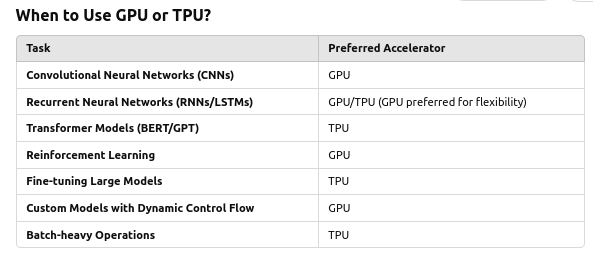

**Here, we have data in the form of text. This is a task of text generation, but we can convert it into a supervised task. This means we can transform it into input and output columns.**

**Convert supervised dataset**

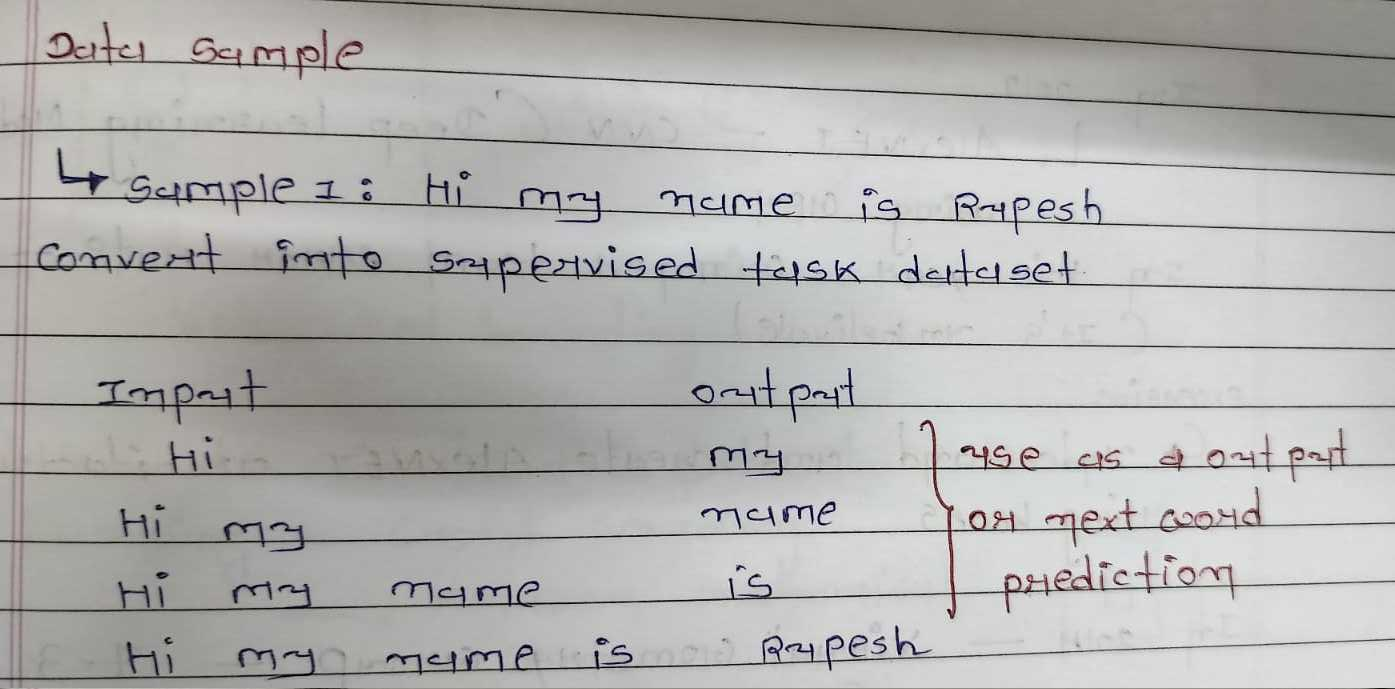


- Like this, we convert the data into the form of input and output.

- This data is not ready to fit into an LSTM; we need to convert it into numerical form.

In [3]:
# import libaray
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer


In [4]:
# Open the text file in read mode with UTF-8 encoding
file = open('/content/1661-0.txt', 'r', encoding='utf8')

# Read all lines from the file into a list
data = file.readlines()

# Initialize a Keras Tokenizer to convert text into numerical representations
tokenizer = Tokenizer()

# Fit the tokenizer on the text data, building a vocabulary of words from the dataset
tokenizer.fit_on_texts(data)

# Retrieve the word index, which is a dictionary mapping words to unique integers
tokenizer.word_index


{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'a': 5,
 'i': 6,
 '”': 7,
 'in': 8,
 'that': 9,
 'it': 10,
 'he': 11,
 'was': 12,
 'you': 13,
 'his': 14,
 'is': 15,
 'my': 16,
 'have': 17,
 'with': 18,
 'as': 19,
 'had': 20,
 'at': 21,
 'which': 22,
 'for': 23,
 'be': 24,
 'not': 25,
 'me': 26,
 'but': 27,
 'from': 28,
 'we': 29,
 'this': 30,
 'said': 31,
 'upon': 32,
 'there': 33,
 'holmes': 34,
 'him': 35,
 'so': 36,
 'her': 37,
 'she': 38,
 'all': 39,
 '’': 40,
 'been': 41,
 'your': 42,
 'on': 43,
 'very': 44,
 'one': 45,
 'by': 46,
 'are': 47,
 '“i': 48,
 'were': 49,
 'an': 50,
 'would': 51,
 'out': 52,
 'no': 53,
 'what': 54,
 'then': 55,
 'up': 56,
 'when': 57,
 'man': 58,
 'could': 59,
 'has': 60,
 'do': 61,
 'into': 62,
 'or': 63,
 'little': 64,
 'will': 65,
 'who': 66,
 'mr': 67,
 'if': 68,
 'some': 69,
 'down': 70,
 'see': 71,
 'now': 72,
 'our': 73,
 'should': 74,
 'may': 75,
 'am': 76,
 'us': 77,
 'over': 78,
 'they': 79,
 'can': 80,
 'more': 81,
 'think': 82,
 'about': 83,
 'mu

In [5]:
# Initialize an empty list to store input sequences
input_sequences = []

# Iterate through each sentence in the dataset
for sentences in data:
    # Skip empty lines or lines containing only newline characters
    if sentences == ' ' or sentences == '\n':
        continue

    # Convert the sentence into a sequence of integers using the tokenizer
    # tokenizer.texts_to_sequences() converts text into a list of word indices based on the tokenizer's vocabulary
    token_list = tokenizer.texts_to_sequences([sentences])[0]

    # Generate n-gram sequences from the tokenized sentence
    for i in range(1, len(token_list)):  # Start from the second word (index 1) to form meaningful n-grams
        n_gram_sequence = token_list[:i+1]  # Slice the token list to create an n-gram ending at position i
        input_sequences.append(n_gram_sequence)  # Append the n-gram to the list of input sequences

# Find the maximum length of all input sequences (used later for padding)
max([len(x) for x in input_sequences])

# Print or return the generated list of input sequences
input_sequences


[[3, 132],
 [3, 132, 34],
 [3, 132, 34, 38],
 [3, 132, 34, 38, 15],
 [3, 132, 34, 38, 15, 229],
 [3, 132, 34, 38, 15, 229, 1],
 [3, 132, 34, 38, 15, 229, 1, 221],
 [3, 132, 34, 38, 15, 229, 1, 221, 6],
 [3, 132, 34, 38, 15, 229, 1, 221, 6, 17],
 [3, 132, 34, 38, 15, 229, 1, 221, 6, 17, 1673],
 [3, 132, 34, 38, 15, 229, 1, 221, 6, 17, 1673, 116],
 [3, 132, 34, 38, 15, 229, 1, 221, 6, 17, 1673, 116, 35],
 [3392, 37],
 [3392, 37, 267],
 [3392, 37, 267, 89],
 [3392, 37, 267, 89, 90],
 [3392, 37, 267, 89, 90, 213],
 [3392, 37, 267, 89, 90, 213, 8],
 [3392, 37, 267, 89, 90, 213, 8, 14],
 [3392, 37, 267, 89, 90, 213, 8, 14, 150],
 [3392, 37, 267, 89, 90, 213, 8, 14, 150, 38],
 [3392, 37, 267, 89, 90, 213, 8, 14, 150, 38, 4768],
 [3392, 37, 267, 89, 90, 213, 8, 14, 150, 38, 4768, 2],
 [4769, 1],
 [4769, 1, 282],
 [4769, 1, 282, 4],
 [4769, 1, 282, 4, 37],
 [4769, 1, 282, 4, 37, 4770],
 [4769, 1, 282, 4, 37, 4770, 10],
 [4769, 1, 282, 4, 37, 4770, 10, 12],
 [4769, 1, 282, 4, 37, 4770, 10, 12, 2

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad all input sequences to a fixed length of 20
# 'maxlen=20' ensures that all sequences have a maximum length of 20
# 'padding="pre"' pads shorter sequences with zeros at the beginning (pre-padding)
padded_input_sequence = pad_sequences(input_sequences, maxlen=20, padding='pre')

# Split the padded input sequences into features (X) and labels (y)
# X contains all tokens except the last one in each sequence
x = padded_input_sequence[:, :-1]

# y contains the last token of each sequence, which is the target label
y = padded_input_sequence[:, -1]

# Print the shapes of the feature and label arrays
print('X shape : ', x.shape)  # X shape represents the number of sequences and their feature length
print('Y shape : ', y.shape)  # Y shape represents the number of target labels


X shape :  (101451, 19)
Y shape :  (101451,)


In [7]:
# In supervised learning, this task is treated as classification because each number represents a word.
# Since there are multiple possible classes (one for each word in the vocabulary), this is a multiclass classification task.
# Convert the output column (y) into one-hot encoded form for multiclass classification.

from tensorflow.keras.utils import to_categorical

# Convert the labels (y) into one-hot encoded format
# 'num_classes' is set to the total number of unique words (vocabulary size) plus 1 to account for padding
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)
print(y.shape)  # Print the shape of the one-hot encoded output

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the input features (X) and labels (y) into training and testing sets
# 'test_size=0.2' reserves 20% of the data for testing
# 'random_state=42' ensures reproducibility by setting a seed for random splitting
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing data
print('X_train shape : ', X_train.shape)  # Training features
print('X_test shape : ', X_test.shape)    # Testing features
print('y_train shape : ', y_train.shape)  # Training labels (one-hot encoded)
print('y_test shape : ', y_test.shape)    # Testing labels (one-hot encoded)


(101451, 8922)
X_train shape :  (81160, 19)
X_test shape :  (20291, 19)
y_train shape :  (81160, 8922)
y_test shape :  (20291, 8922)


In [8]:
# Import necessary modules for building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Initialize a sequential model
model = Sequential()

# Add an embedding layer to convert input word indices into dense vectors
# 'len(tokenizer.word_index) + 1' sets the vocabulary size (accounting for padding token)
# '100' is the embedding dimension, i.e., each word is represented as a 100-dimensional vector
# 'input_length=20' specifies that input sequences are of length 20
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=19))

# Add an LSTM layer with 150 units
# LSTM processes the sequence data and learns temporal dependencies
model.add(LSTM(150))

# Add a dense (fully connected) layer for the output
# 'len(tokenizer.word_index) + 1' is the number of output classes (vocabulary size + padding)
# 'activation="softmax"' applies softmax to produce a probability distribution over the classes
model.add(Dense(len(tokenizer.word_index) + 1, activation='softmax'))

# Compile the model
# 'loss="categorical_crossentropy"' is the loss function for multiclass classification
# 'optimizer="rmsprop"' is the optimization algorithm used for updating weights
# 'metrics=["accuracy"]' tracks accuracy during training and evaluation
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [9]:
# Build the model with the specified input shape
# 'input_shape=(None, 20)' defines the expected input dimensions:
#   - 'None' indicates that the batch size can vary.
#   - '20' represents the fixed length of input sequences (sequence length).
model.build(input_shape=(None, 19))  # Replace 20 with your actual input sequence length if different.

# Print a summary of the model architecture
# 'summary()' provides a detailed overview of the model layers, including:
#   - Layer names and types
#   - Output shapes for each layer
#   - Number of trainable parameters in each layer
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 100)           892200    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8922)              1347222   
                                                                 
Total params: 2390022 (9.12 MB)
Trainable params: 2390022 (9.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 5,batch_size=500)

Epoch 1/5
163/163 [==============================] - 141s 844ms/step - loss: 6.8336 - accuracy: 0.0518 - val_loss: 6.4949 - val_accuracy: 0.0523
Epoch 2/5
163/163 [==============================] - 129s 790ms/step - loss: 6.4727 - accuracy: 0.0524 - val_loss: 6.4831 - val_accuracy: 0.0523
Epoch 3/5
163/163 [==============================] - 127s 783ms/step - loss: 6.4644 - accuracy: 0.0524 - val_loss: 6.4846 - val_accuracy: 0.0523
Epoch 4/5
163/163 [==============================] - 126s 776ms/step - loss: 6.4500 - accuracy: 0.0524 - val_loss: 6.4550 - val_accuracy: 0.0523
Epoch 5/5
131/163 [=======================>......] - ETA: 22s - loss: 6.4059 - accuracy: 0.0524

In [13]:
import time
import numpy as np

# Initialize the input text for generating predictions
text = 'My marriage had'

# Loop to generate the next 10 words for the input text
for i in range(10):
    # Convert the input text into tokenized sequences
    # 'tokenizer.texts_to_sequences' maps each word in the text to its corresponding integer index
    token_text = tokenizer.texts_to_sequences([text])[0]

    # Pad the tokenized sequence to ensure it matches the input length expected by the model
    # 'maxlen=20' ensures sequences are padded to length 20
    # 'padding="pre"' pads shorter sequences at the beginning with zeros
    padded_token_text = pad_sequences([token_text], maxlen=19, padding='pre')

    # Predict the next word's probability distribution using the trained model
    # 'model.predict' returns the probabilities for each word in the vocabulary
    pos = np.argmax(model.predict(padded_token_text))  # Find the word index with the highest probability

    # Find the word corresponding to the predicted index
    for word, index in tokenizer.word_index.items():
        if index == pos:  # Match the predicted index with a word in the tokenizer's word-index dictionary
            # Append the predicted word to the current text
            text = text + " " + word
            print(text)  # Print the updated text with the next word
            time.sleep(1)  # Pause for 1 second to simulate a step-by-step prediction process


1/1 [==============================] - 0s 27ms/step
My marriage had the
1/1 [==============================] - 0s 25ms/step
My marriage had the the
1/1 [==============================] - 0s 26ms/step
My marriage had the the the
1/1 [==============================] - 0s 27ms/step
My marriage had the the the the
1/1 [==============================] - 0s 28ms/step
My marriage had the the the the the
1/1 [==============================] - 0s 27ms/step
My marriage had the the the the the the
1/1 [==============================] - 0s 27ms/step
My marriage had the the the the the the the
1/1 [==============================] - 0s 26ms/step
My marriage had the the the the the the the the
1/1 [==============================] - 0s 26ms/step
My marriage had the the the the the the the the the
1/1 [==============================] - 0s 26ms/step
My marriage had the the the the the the the the the the
